# Machine Learning Classifiers using Scikit-Learn

## Scikit-Learn

- scikit-learn library provides varietes of classification, regression and clustering algorithms
- provides user-friendly and consistent interface for using those algorithms efficiently and productively
- popular in academia as well as in industry
- for more info see [https://scikit-learn.org/](https://scikit-learn.org/stable/)

## Machine Learning Steps

- recall from introduction:
![Overview of ML systems](./images/01_09.png)

- the following are the typical steps:
    1. Load data
    2. Analyze data
    3. Visualize data
    4. Split data into train-test set
    5. Train and test a handful of models
    6. Select the best model
    7. Deploy the model
    
- next we'll dive into each step

## 1. Load data

- loading the Iris dataset from scikit-learn
- the third column represents the petal length, and the fourth column the petal width of the flower examples
- the classes are already converted to integer labels where:
    - 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
- [https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)
- `sklearn.datasets.load_iris` API - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
# dataset is a data Bunch type in scikit learn
type(iris)

sklearn.utils.Bunch

In [6]:
# the data itself is numpy's ndarray
type(iris.data)

numpy.ndarray

In [7]:
# list all the attributes of iris Bunch object
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# list all the members of data (ndarray) object
dir(iris.data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

## 2. Analyze data
- use Pandas DataFrame object to analyze and visualize dataset
- convert data Bunch object to Pandas DataFrame
- use DataFrame object's various methods and attibutes to learn about the data:
- typically:
    1. learn the dimension of the dataset
    2. peek at the data itself
    3. see the statistical summary of all attributes
    4. see breakdown of the data by the class variable

In [12]:
# use np.c_ numpy's concatenate function
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris.feature_names + ['target'])

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
# update target id with target name
for i in range(3):
    df.loc[df['target'] == i, 'target'] = iris.target_names[i]

In [15]:
# peek the data; head and tail
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
# find the dimension
df.shape

(150, 5)

In [17]:
# statistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# class distribution
print(df.groupby('target').size())

target
setosa        50
versicolor    50
virginica     50
dtype: int64


## 3. Visualize data
- visualize may help us understand the dataset visually
- two types of plots:
    1. Univariate plot to better understand each attribute
    2. Multivariate plot to better understand the relationships between attributes

<AxesSubplot:>

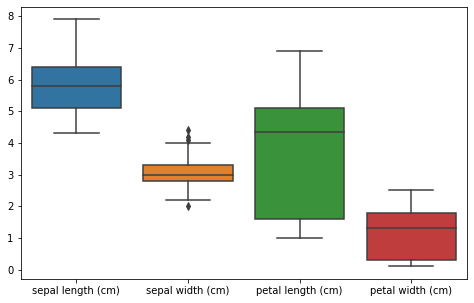

In [19]:
# create boxplot as univariate plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df.loc[:, iris.feature_names], ax=ax)

<AxesSubplot:ylabel='Count'>

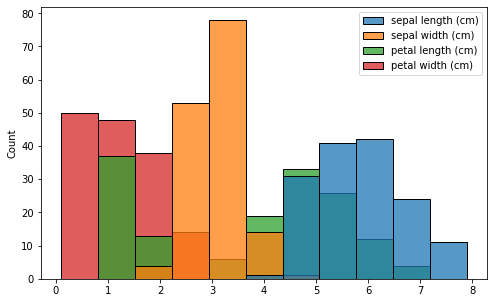

In [20]:
# histograms of each feature
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df.loc[:, iris.feature_names], ax=ax)

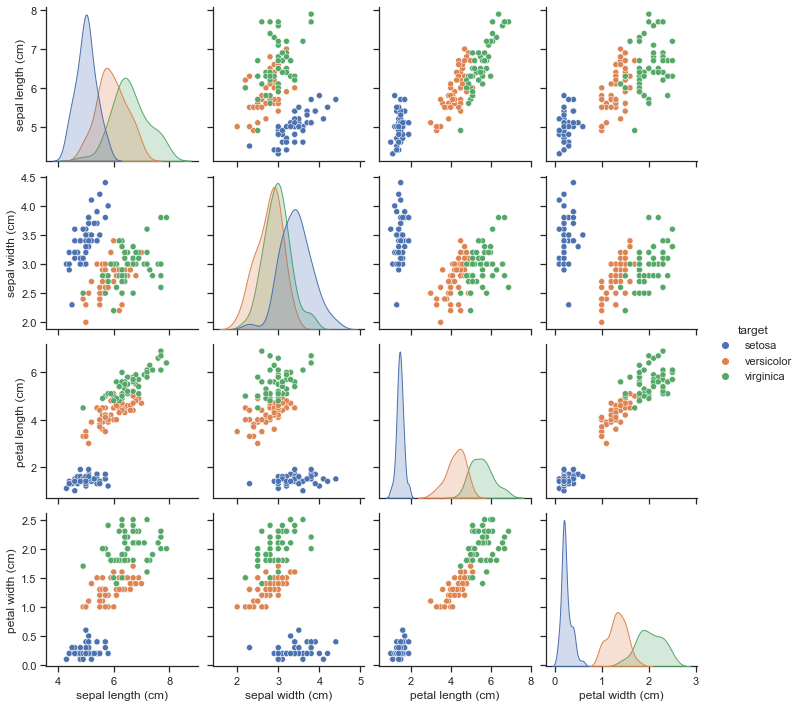

In [21]:
# use seaborn's pairplot for pair-wise scatter matrix
sns.set_theme(style="ticks")
sns.pairplot(data=df, hue="target")

In [22]:
# just use petal-length and petal width features
# X and y are conventions used to represet X as a matrix of features and y as a vector of labels
X = iris.data
y = iris.target

In [23]:
# print the list of unique labels
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [24]:
# let's look at the first 10 rows of data
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## 4. Split data into training and test set

- training set is used to fit a model
- test set needs to be set aside to evaluate the model
    - gives some metric on how well the model will likely to perform if deployed on unseen real-world data
- typical split is 80/20 or 75/25 - 80% or 75% training and 20% or 25% test data
    - rule of thumb: if you've fewer data, use 80/20 
    - if you've larger data set, use 75/25 or 70/30 or 60/40

```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- use random seed to reproduce the same random numbers
- use stratification; means the training and test subset splits have the same proportions of class labels as the input dataset

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [26]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


## 5. Select a classifier
- choosing appropriate algorithm for a particular problem requires practice and experience
    - each algorithm has its own quirks and is based on certain assumptions
- **No free lunch theorem** by David H. Wolpert
    - no single classifier works best across all possible scenarios
- it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem

### Training a Perceptron classifier
- perceptron is one of the earliest machine learning algorithms that models human brain neurons

### Artificial neurons - an early history
- in order to design AI, the first concept of a simplified brain cell called **McCulloch-Pitts (MCP)** neuron in 1943
    - named after the scientists
- Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals
![Image](./images/02_01.png)
- nerve cell is a simple logic gate with binary outputs
- multiple signals arrive at the dendrites, then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon
- in 1957, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model
- the proposed algorithm is a rule that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make a decision of whether a neuron fires (transmits a signal) or not
- in supervised learning and binary classification problem, such an algorithm could then be used to predict whether a new data point belongs to one class or the other
- we'll use the Perceptron and a few other classification algorithms implemented in scikit-learn library
- most algorithms in scikit-learn already support multiclass classification by default using **one-vs.-rest (OvR)** method
    - allowing us to feed all samples with 3 different classes/labels to the perceptron algorithm

In [27]:
from sklearn.linear_model import Perceptron

# eta0 - learning rate
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=1)

In [28]:
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


### Let's examine the misclassified samples
- sometime it's worth looking at the samples that are misclassified 
    - for the sake of understanding the nature of the samples and how they're classified

In [29]:
# find the indices of all the misclassified samples
misclassified = np.where(y_test != y_pred)

In [30]:
misclassified

(array([21]),)

In [31]:
# let's create DataFrame to examine the data
# combin all DataFrame along the axis-1 vertically
mis_df = pd.concat([pd.DataFrame(misclassified[0].transpose(), columns=['ID']),
                    pd.DataFrame(X_test[misclassified], columns=iris.feature_names), 
                    pd.DataFrame(y_test[misclassified], columns=['y_true']), 
                    pd.DataFrame(y_pred[misclassified], columns=['y_pred'])
                   ], 
                   axis=1)

In [32]:
mis_df

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,21,5.6,3.0,4.5,1.5,1,2


In [33]:
# let's convert target id to target names
for i in range(3):
    mis_df.loc[mis_df['y_true'] == i, 'y_true'] = iris.target_names[i]
    mis_df.loc[mis_df['y_pred'] == i, 'y_pred'] = iris.target_names[i]

In [34]:
mis_df

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,21,5.6,3.0,4.5,1.5,versicolor,virginica


In [35]:
# let's create a function to find the misclassified samples
# we can use it for the results from all the classifiers
def getMisClassifiedSamples(X_test, y_test, y_pred):
    # find the indices of all the misclassified samples
    misclassified = np.where(y_test != y_pred)
    # let's create DataFrame to examine the data
    mis_df = pd.concat([pd.DataFrame(misclassified[0].transpose(), columns=['ID']),
                    pd.DataFrame(X_test[misclassified], columns=iris.feature_names), 
                    pd.DataFrame(y_test[misclassified], columns=['y_true']), 
                    pd.DataFrame(y_pred[misclassified], columns=['y_pred'])
                   ], 
                   axis=1)
    for i in range(3):
        mis_df.loc[mis_df['y_true'] == i, 'y_true'] = iris.target_names[i]
        mis_df.loc[mis_df['y_pred'] == i, 'y_pred'] = iris.target_names[i]
    return mis_df

In [36]:
# let's test the function
mis_df = getMisClassifiedSamples(X_test, y_test, y_pred)

In [37]:
mis_df

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,21,5.6,3.0,4.5,1.5,versicolor,virginica


## 6. Scale/standarize the features
- scale the feature values using StandardScaler
- estimate sample mean and standard deviation and use those parameters to scale both the training and test samples
- [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
    - for each sample: $\vec{x} = \frac{(\vec{x}-u)}{s}$ where $u$ = mean and $s$ = standard deviation 
- More on feature scaling in Feature Engineering Chapter

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X) # fit the whole data to calculate mean and standard deviation
X_train_sc = sc.transform(X_train) # transform training set
X_test_sc = sc.transform(X_test) # transform validation set

### create and test model with the standarized/scaled features
- let's retrain the Perceptron with the same parameter on the scaled features

In [39]:
# eta0 - learning rate
ppn1 = Perceptron(eta0=0.1, random_state=1)
ppn1.fit(X_train_sc, y_train)
y_pred_sc = ppn1.predict(X_test_sc)
print('Misclassified examples: %d' % (y_test != y_pred_sc).sum())

Misclassified examples: 5


In [40]:
# let's use the X_test so we can see the original measurements of 
mis_df = getMisClassifiedSamples(X_test, y_test, y_pred_sc)

In [41]:
mis_df

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,2,5.1,2.5,3.0,1.1,versicolor,setosa
1,9,6.8,2.8,4.8,1.4,versicolor,virginica
2,21,5.6,3.0,4.5,1.5,versicolor,setosa
3,28,6.3,3.3,4.7,1.6,versicolor,virginica
4,29,6.5,2.8,4.6,1.5,versicolor,virginica


In [42]:
# if you want to examine the scaled features pass scaled data
mis_df_sc = getMisClassifiedSamples(X_test_sc, y_test, y_pred_sc)

In [43]:
mis_df_sc

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,2,-0.900681,-1.282963,-0.430828,-0.130755,versicolor,setosa
1,9,1.159173,-0.592373,0.592246,0.264142,versicolor,virginica
2,21,-0.294842,-0.131979,0.421734,0.395774,versicolor,setosa
3,28,0.553333,0.558611,0.535409,0.527406,versicolor,virginica
4,29,0.795669,-0.592373,0.478571,0.395774,versicolor,virginica


## 7. Evaluate the classifier
- there are various metrics to evalute the performance of a model
- for classification problems, accuracy, confusion matrix, precision, recall, and F1 score are commonly used

### Error (ERR)
- percentage of samples misclassified
- works well on balanced dataset where each class has same number samples
- $ERR = \frac {FP + FN}{P+N}$


### Accuracy (ACC)
- accuracy is defined as the percentage of samples correctly classified
- works well on balanced dataset where each class has same number of samples

- $ACC = \frac{TP+TN}{P+N} = 1 - ERR $ 

### Confusion Matrix

![Confusion Matrix](./images/confusion_matrix.png)


#### True Positives (TPs)
- the number of positive samples that the model correctly classified as positive
    
#### True Negatives (TNs)
- the number of negative samples that the model correctly classified as negative

#### False Positives (FPs)
- the number of negative samples that the model incorrectly classified as positive

#### False Negatives (FNs)
- the number of positive examples that the model incorrectly classified as negative

#### Precision or Positive Predictive Value
- fraction of correctly classified positive instances among all the instances predicted as positive 
- $ precision = \frac{TP}{TP+FP}$

#### Recall or Sensitivity or True Positive Rate (TPR)
- fraction of correctively classified positive instances among all the positive instances
- $ recall = \frac{TP}{P}$

#### F1-score
- harmonic mean of precision and recall
- $f_1 = \frac{2TP}{2TP+FP+FN} = 2\times\frac{precision \times recall}{precision + recall}$

In [46]:
# let's look at the accuracy score first
from sklearn.metrics import accuracy_score

print('Accuracy of Perceptron on original data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy of Perceptron on original data: 0.967


In [47]:
# each classifier object also has score method that can be used to calcualte the accuracy
print('Accuracy of Perceptron on original data: %.3f' % ppn.score(X_test, y_test))

Accuracy of Perceptron on original data: 0.967


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# not very informative

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [50]:
# let's plot the confustion matrix
from sklearn.metrics import plot_confusion_matrix

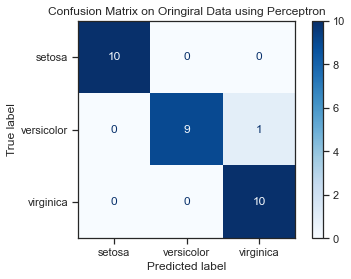

In [51]:
fig = plot_confusion_matrix(ppn, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix on Oringiral Data using Perceptron")
plt.show()

In [52]:
# calculate and print the other metrics with classification_report function
from sklearn.metrics import classification_report

In [53]:
print('Classification report on original data using Perceptron')
print(classification_report(y_test, y_pred))

Classification report on original data using Perceptron
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Decision tree classifier
- decision tree a supervised learning method
- model is easier to visualize and understand
- tree is composed of nodes and those nodes are chosen looking for the optimum split of the features
    - two criteria are used: `gini` and `entropy`
- see  https://quantdare.com/decision-trees-gini-vs-entropy/ for the differnce between `gini` and `entropy`

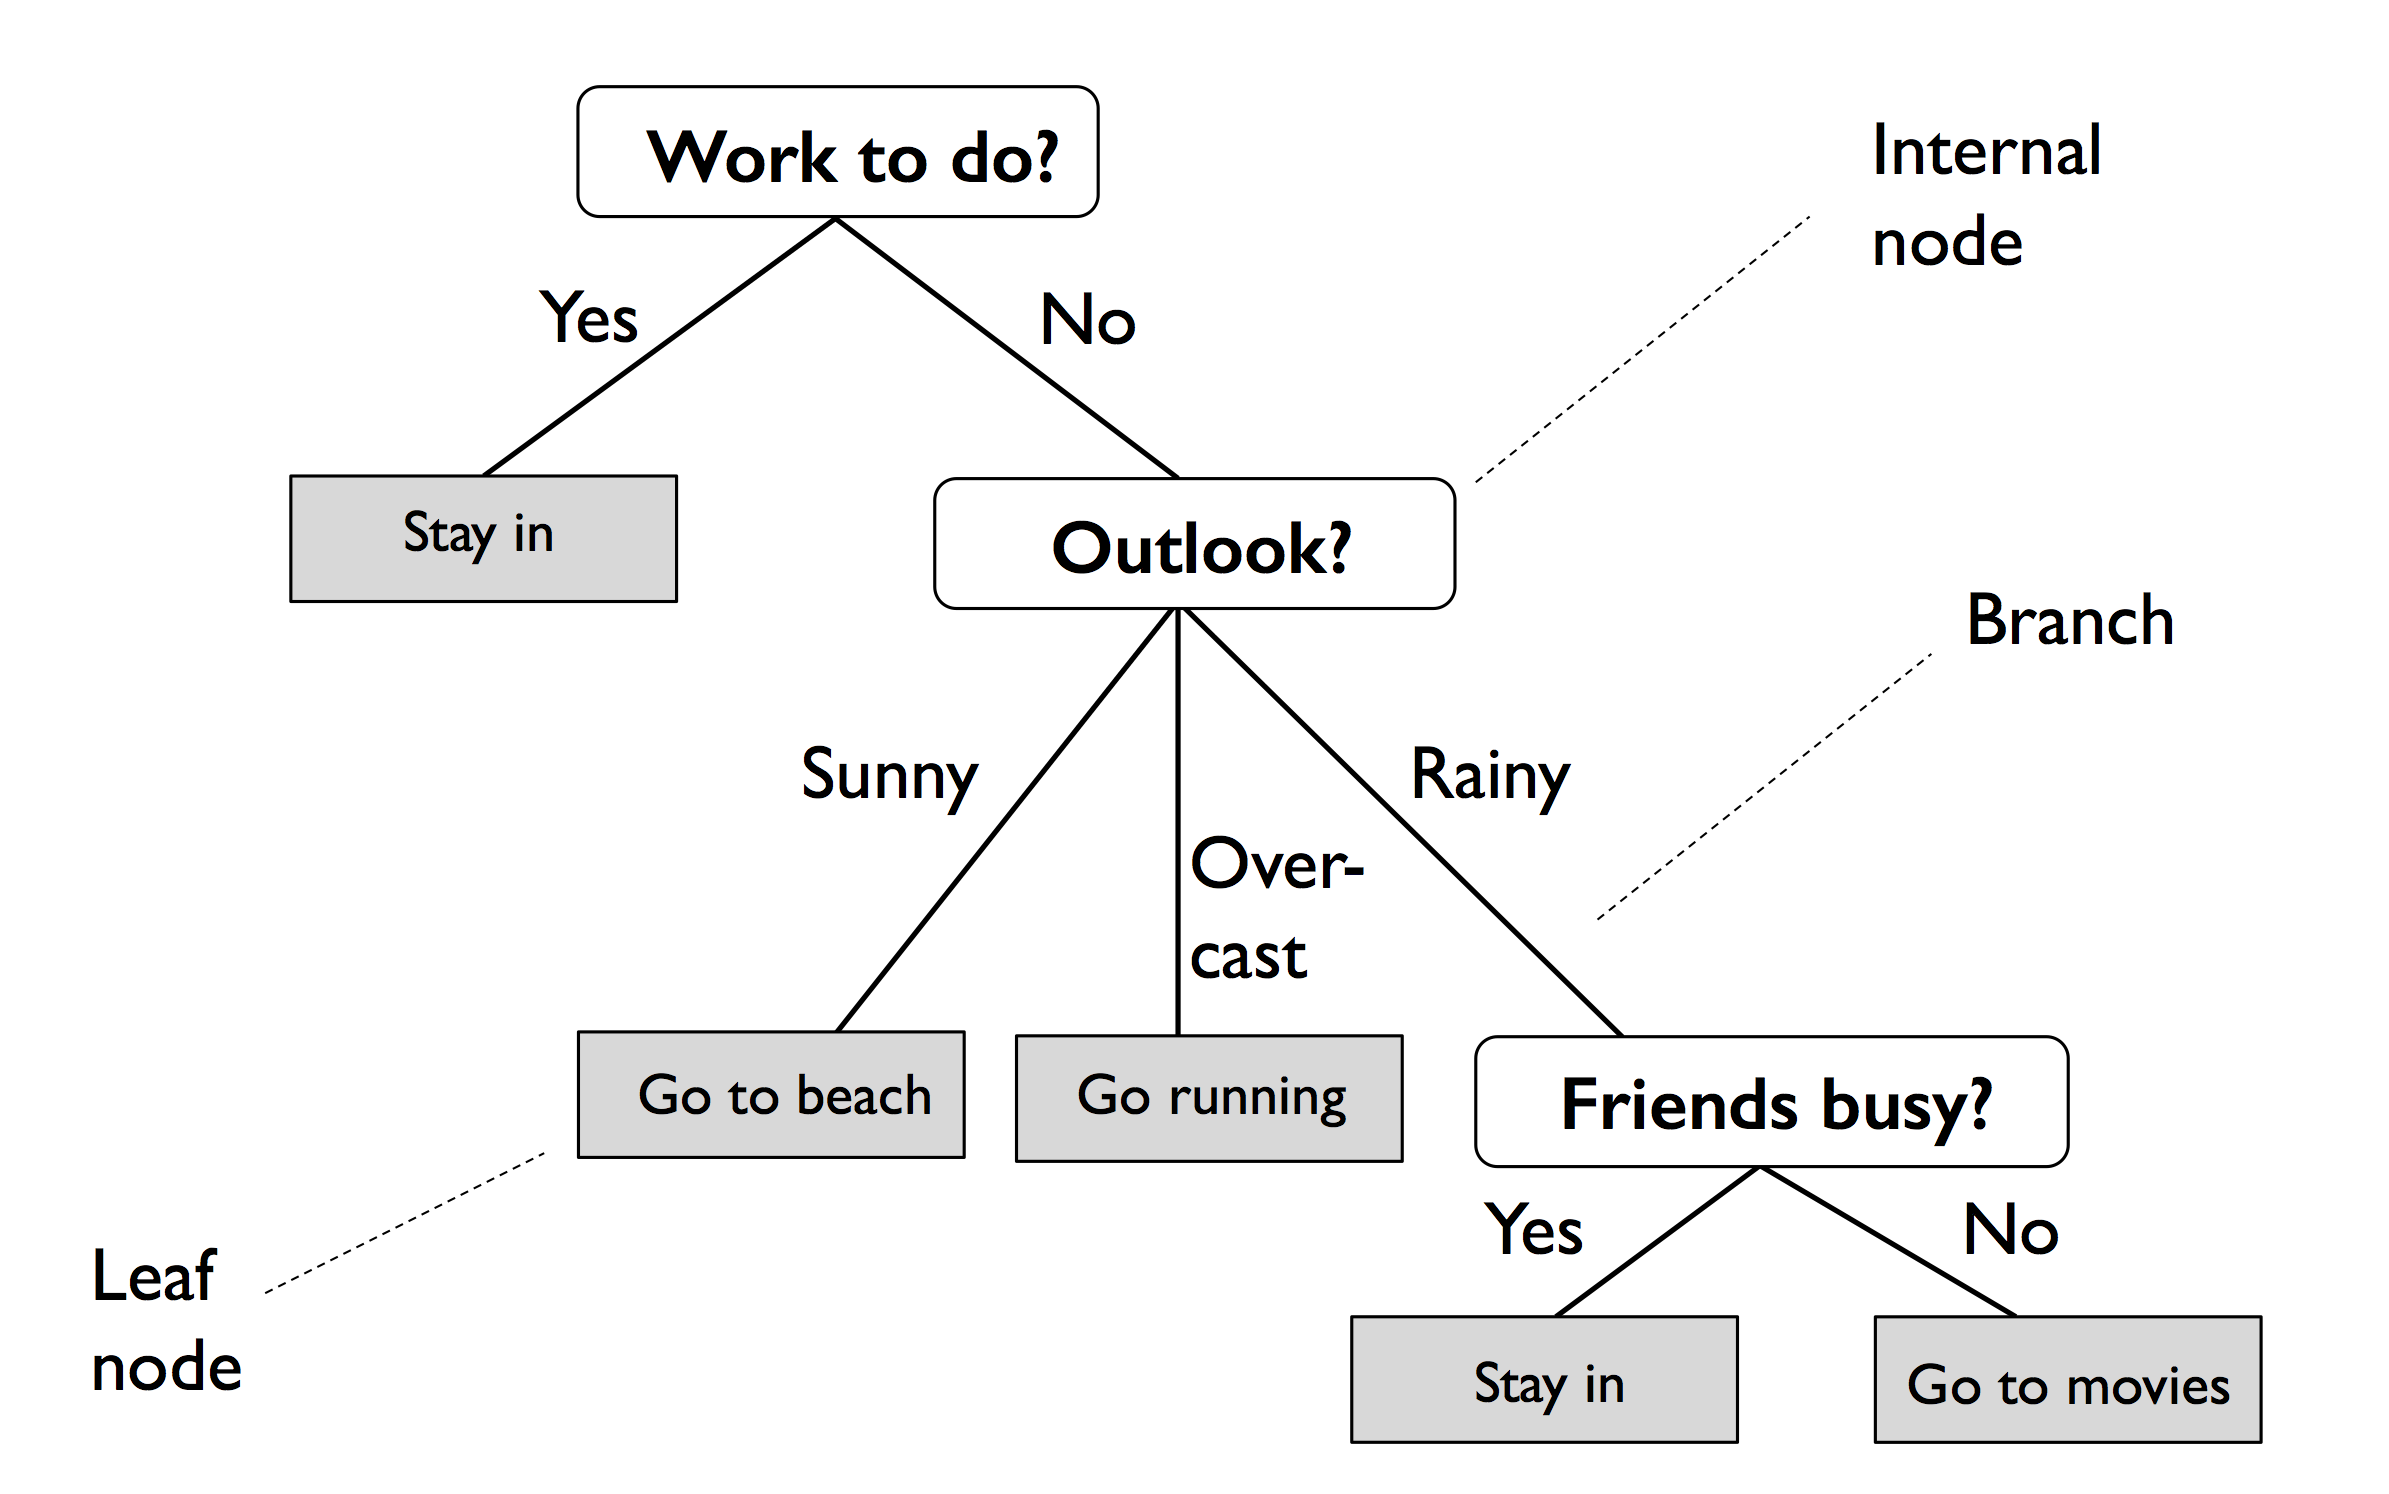

In [54]:
Image(filename='images/03_17.png', width=500)

## Building a decision tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

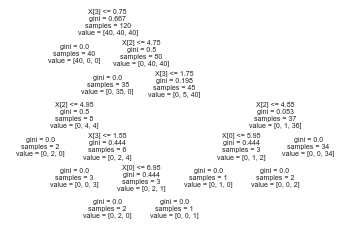

In [56]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

## Better visualization with graphviz
- install graphviz binary and Python API library
- install Graphviz on the system
- see system specific answer - https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

In [57]:
! pip install graphviz

In [58]:
import graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True, special_characters=True)

In [59]:
graph = graphviz.Source(dot_data)

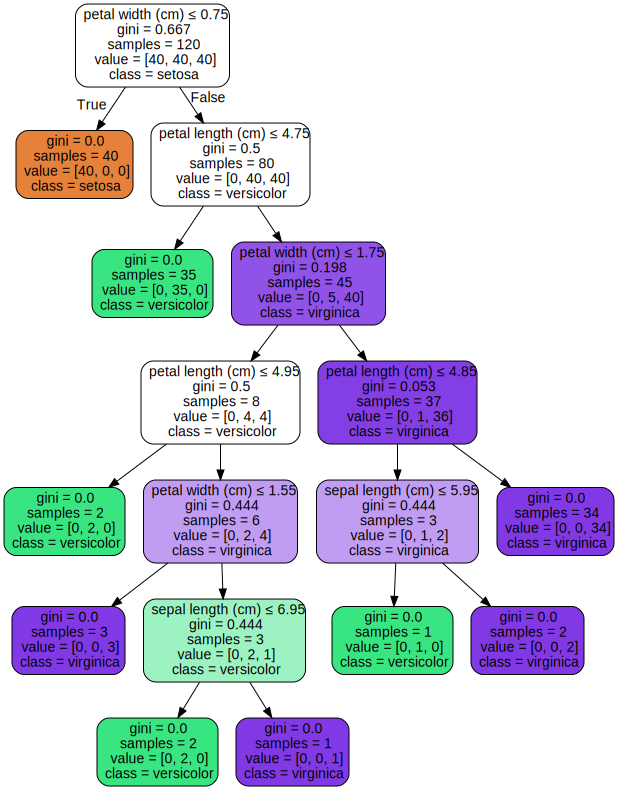

In [60]:
graph

In [61]:
y_pred = tree_model.predict(X_test)
# how many samples are correctly classified?
print('Correctly classified samples on original data: %d' % (y_test == y_pred).sum())

Correctly classified samples: 29


In [65]:
# how many samples are misclassified?
print(f'Misclassified samples on original data: {(y_test != y_pred).sum()}')

Misclassified samples on original data: 1


In [69]:
mis_df = getMisClassifiedSamples(X_test, y_test, y_pred)

In [70]:
mis_df
# is it the same sample that was also mis-classified by Perceptron?

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,25,4.9,2.5,4.5,1.7,virginica,versicolor


In [66]:
# what is the accuracy?
print('Accuracy on original data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy on original data: 0.967


In [67]:
# accuracy = correctly classified samples/total number of samples
print(f'Accuracy on original data: = {29/30:.3f}')

Accuracy on original data: = 0.967


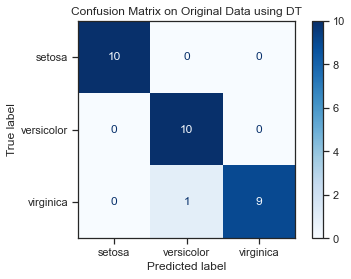

In [68]:
# plot the confusion matrix
fig = plot_confusion_matrix(tree_model, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix on Original Data using DT")
plt.show()

In [71]:
print('Classification report on original data using DT')
print(classification_report(y_test, y_pred))

Classification report on original data using DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Random Forest (RF) Classifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- a ensemble-based meta classifier that fits a number of decision tree classifiers on various sub-samples of the dataset
- uses majority voting from decision trees to do the final prediction
- RF applied to Titanic dataset - https://www.kaggle.com/alexisbcook/getting-started-with-titanic 
![RF Titanic](./images/random_forest_titanic.png)
- let's apply RF classifier to the IRIS dataset

In [72]:
# import the classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [73]:
RF = RandomForestClassifier() # use all default values

In [74]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = RF.predict(X_test)

In [76]:
print(f'Accuracy on original data using RF = {accuracy_score(y_test, y_pred):.3f}')

Accuracy on original data using RF = 0.967


In [77]:
# let's look at the misclassified samples
mis_df = getMisClassifiedSamples(X_test, y_test, y_pred)

In [78]:
getMisClassifiedSamples(X_test, y_test, y_pred)
# is it the same sample that was misclassified by Perceptron and Decision Tree?

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_true,y_pred
0,25,4.9,2.5,4.5,1.7,virginica,versicolor


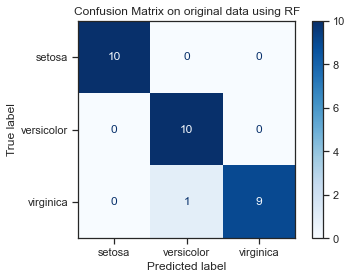

In [79]:
# plot the confusion matrix
fig = plot_confusion_matrix(RF, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix on original data using RF")
plt.show()

In [80]:
print('Classification report on original data using RF')
print(classification_report(y_test, y_pred))

Classification report on original data using RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 8. Select the best model
- Model selection chapter dives into the details